# <font color='Blue'>**DSML End Term Project**</font>
## <font color='Blue'>**Group 5 Section A (MBA)**</font>


*   Aditya Kodte (MBA21071)
*   Aravind N (MBA21084)
*   Nilay Kaushik (MBA21111)
*   Piyush Pawar (MBA21039)
*   Sonu (MBA21132)
*   Zeeshan Ahmad (MBA21137)






In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [3]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookingss.csv to hotel_bookingss.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['hotel_bookingss.csv']))# Dataset is now stored in a Pandas Dataframe

In [6]:
# reading data
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [7]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# checking for null values 
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488                0.408744
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 16340               13.686238
company                              112593               94.306893
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

In [11]:
# filling null values with zero
df.fillna(0, inplace = True)

In [12]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
2224                       3       0  ...    No Deposit    0.0   174.0   
2409                       0       0  ...    No Deposit    0.0   174.0   
3181                       2       0  ...    No Deposit   38.0     0.0   
3684                       4       0  ...    No Deposit  308.0     0.0   
3708                       4       0  ...    No Deposit  308.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
115029                     3       0  ...    No Deposit    7.0     0.0   
115091                     1       0  ...    No Deposit    0.0     0.0   
116251                     1       0  ...    No Deposit  425.0     0.0   
116534                     5       0  ...    No Deposit    9.0     0.0   
117087                     2       0  ...    No Deposit   52.0     0.0   

       days_in_waiting_list    customer_type     adr  \
2224                      0  Transient-Party    0.00   
2409                      0        Transient    0.00   
3181                      0  Transient-Party    0.00   
3684                    122  Transient-Party    0.00   
3708                    122  Transient-Party    0.00   
...                     ...              ...     ...   
115029                    0        Transient  100.80   
115091                    0        Transient    0.00   
116251                    0        Transient   73.80   
116534                    0  Transient-Party   22.86   
117087                    0        Transient    0.00   

        required_car_parking_spaces  total_of_special_requests  \
2224                              0                          0   
2409                              0                          0   
3181                              0         

In [13]:
df = df[~filter]
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    0.0     0.0   
1                          0       2  ...    No Deposit    0.0     0.0   
2                          1       1  ...    No Deposit    0.0     0.0   
3                          1       1  ...    No Deposit  304.0     0.0   
4                          2       2  ...    No Deposit  240.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     0.0   
119386                     5       3  ...    No Deposit    9.0     0.0   
119387                     5       2  ...    No Deposit    9.0     0.0   
119388                     5       2  ...    No Deposit   89.0     0.0   
119389                     7       2  ...    No Deposit    9.0     0.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

## <font color='Blue'>**Data Preproceessing**</font>

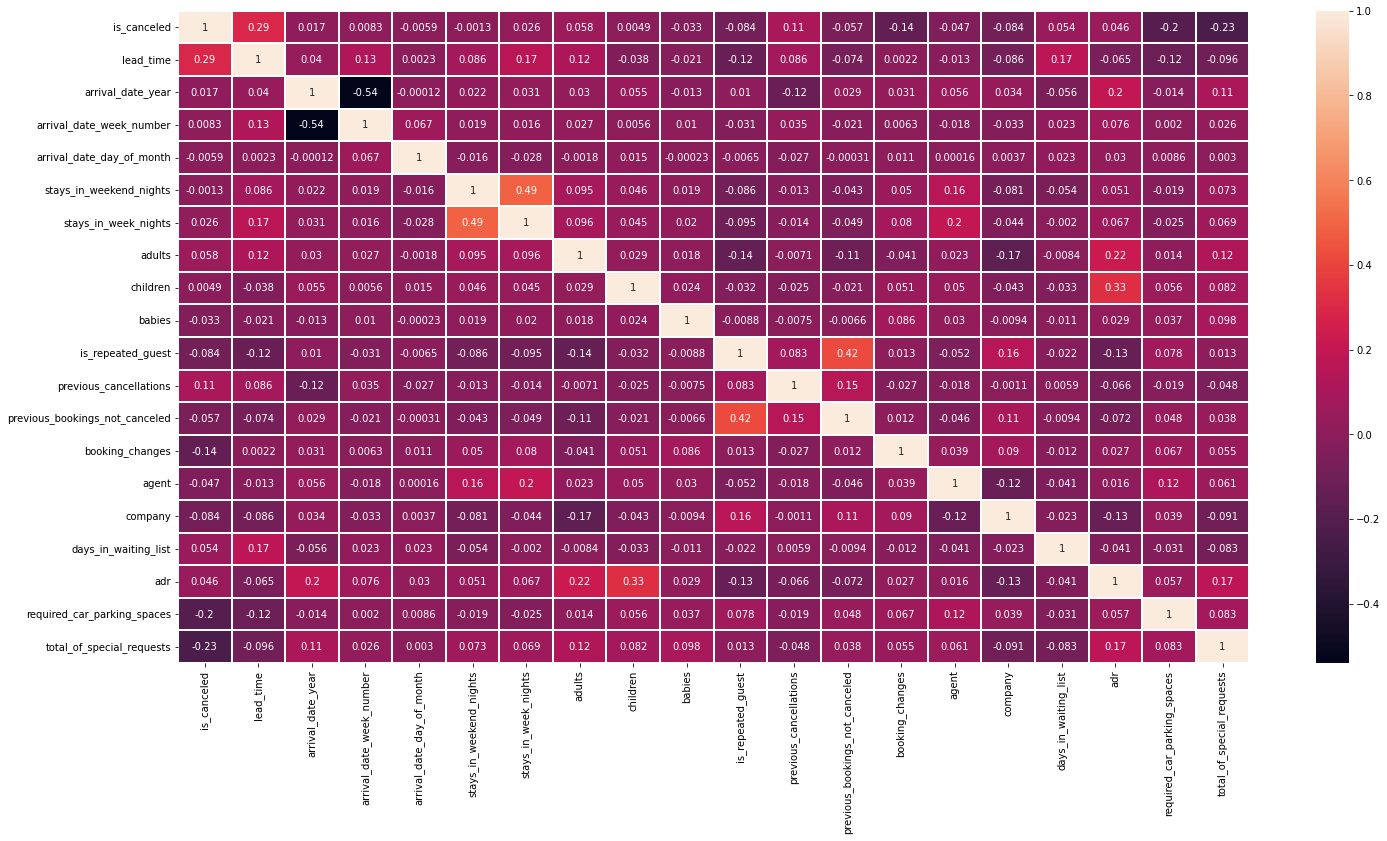

In [14]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sn.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [15]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [16]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [17]:
df.head()

hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0        342               July   
1  Resort Hotel            0        737               July   
2  Resort Hotel            0          7               July   
3  Resort Hotel            0         13               July   
4  Resort Hotel            0         14               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     0       2       0.0  ...   
1                        0                     0       2       0.0  ...   
2                        0                     1       1       0.0  ...   
3                        0                     1       1       0.0  ...   
4                        0                     2       2       0.0  ...   

   previous_bookings_not_canceled reserved_room_type deposit_type  agent  \
0                               0                  C   No Deposit    0.0   
1                               0                  C   No Deposit    0.0   
2                               0                  A   No Deposit    0.0   
3                               0                  A   No Deposit  304.0   
4                               0                  A   No Deposit  240.0   

   company  customer_type   adr required_car_parking_spaces  \
0      0.0      Transient   0.0                           0   
1      0.0      Transient   0.0                           0   
2      0.0      Transient  75.0                           0   
3      0.0      Transient  75.0                           0   
4      0.0      Transient  98.0                           0   

  total_of_special_requests  reservation_status_date  
0                         0               2015-07-01  
1                         0               2015-07-01  
2                         0               2015-07-02  
3                         0               2015-07-02  
4                         1               2015-07-03  

[5 rows x 26 columns]

In [18]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [19]:
cat_df = df[cat_cols]
cat_df.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient              2015-07-01  
1                  C   No Deposit     Transient              2015-07-01  
2                  A   No Deposit     Transient              2015-07-02  
3                  A   No Deposit     Transient              2015-07-02  
4                  A   No Deposit     Transient              2015-07-03

In [20]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [21]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [22]:
cat_df.head()

hotel meal market_segment distribution_channel reserved_room_type  \
0  Resort Hotel   BB         Direct               Direct                  C   
1  Resort Hotel   BB         Direct               Direct                  C   
2  Resort Hotel   BB         Direct               Direct                  A   
3  Resort Hotel   BB      Corporate            Corporate                  A   
4  Resort Hotel   BB      Online TA                TA/TO                  A   

  deposit_type customer_type  year  month  day  
0   No Deposit     Transient  2015      7    1  
1   No Deposit     Transient  2015      7    1  
2   No Deposit     Transient  2015      7    2  
3   No Deposit     Transient  2015      7    2  
4   No Deposit     Transient  2015      7    3

In [23]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [24]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [25]:
cat_df.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
0      0     0               0                     0                   0   
1      0     0               0                     0                   0   
2      0     0               0                     0                   1   
3      0     0               1                     1                   1   
4      0     0               2                     2                   1   

   deposit_type  customer_type  year  month  day  
0             0              0     0      7    1  
1             0              0     0      7    1  
2             0              0     0      7    2  
3             0              0     0      7    2  
4             0              0     0      7    3

In [26]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0             342                        27                          1   
1             737                        27                          1   
2               7                        27                          1   
3              13                        27                          1   
4              14                        27                          1   
...           ...                       ...                        ...   
119385         23                        35                         30   
119386        102                        35                         31   
119387         34                        35                         31   
119388        109                        35                         31   
119389        205                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled  agent  company     adr  \
0                                    0    0.0      0.0    0.00   
1                                    0    0.0      0.0    0.00   
2                                    0    0.0      0.0   75.00   
3                                    0  304.0      0.0   75.00   
4                                    0  240.0      0.0   98.00   
...                                ...    ...      ...     ...   
119385                               0  394.0      0.0   96.14   
119386                               0    9.0      0.0  225.43   
119387                               0    9.0      0.0  157.71   
119388                               0   89.0      0.0  104.40   
119389                               0    9.0      0.0  151.20   

        required_car_parking_spaces  total_of_special_requests  
0                                 0                          0  
1                                 0                          0  
2                                 0                          0  
3                                 0                          0  
4                                 0                          1  
...                             ...                        ...  
119385                            0                          0  
119386                            0                          2  
119387                            0                          4  
119388                            0       

In [27]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

In [28]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [29]:
num_df.var()

lead_time                         2.582757
arrival_date_week_number          0.440884
arrival_date_day_of_month         0.506325
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
agent                             3.535793
company                           1.346883
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
dtype: float64

In [30]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [31]:
num_df.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   5.837730                  3.332205                   0.693147   
1   6.603944                  3.332205                   0.693147   
2   2.079442                  3.332205                   0.693147   
3   2.639057                  3.332205                   0.693147   
4   2.708050                  3.332205                   0.693147   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

      agent  company       adr  required_car_parking_spaces  \
0  0.000000      0.0  0.000000                            0   
1  0.000000      0.0  0.000000                            0   
2  0.000000      0.0  4.330733                            0   
3  5.720312      0.0  4.330733                            0   
4  5.484797      0.0  4.595120                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

In [32]:
x = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']
#dfDirty = x+0.00001*np.random.rand(119210,26)

In [33]:
x.shape, y.shape

((119210, 26), (119210,))

In [34]:
# splitting data into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [35]:
x_train.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
98195      1     0               2                     2                   1   
94751      1     0               2                     2                   1   
35790      0     2               3                     2                   1   
17165      0     2               3                     2                   1   
26837      0     0               2                     2                   1   

       deposit_type  customer_type  year  month  day  ...  children  babies  \
98195             0              0     2      9   26  ...       0.0       0   
94751             0              2     2      8    9  ...       1.0       0   
35790             0              0     3      5    2  ...       0.0       0   
17165             0              2     0      9   28  ...       0.0       0   
26837             0              0     2      8   12  ...       0.0       0   

       is_repeated_guest  previous_cancellations  \
98195                  0                       0   
94751                  0                       0   
35790                  0                       0   
17165                  0                       1   
26837                  0                       0   

       previous_bookings_not_canceled     agent  company       adr  \
98195                               0  2.397895      0.0  4.872905   
94751                               0  2.302585      0.0  4.787492   
35790                               0  5.147494      0.0  4.239887   
17165                               0  0.000000      0.0  3.737670   
26837                               0  5.484797      0.0  5.393628   

       required_car_parking_spaces  total_of_special_requests  
98195                            0                          0  
94751                            0                          2  
35790                            0                          0  
17165                            0                          0  
26837                            0                          1  

[5 rows x 26 columns]

In [36]:
x_test.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
34034       0     0               2                     2                   6   
97353       1     2               3                     2                   1   
103069      1     0               2                     2                   1   
6079        0     0               2                     2                   1   
111423      1     0               5                     2                   1   

        deposit_type  customer_type  year  month  day  ...  children  babies  \
34034              0              0     3      3   11  ...       0.0       0   
97353              0              2     2      9   15  ...       0.0       0   
103069             0              0     2     12   11  ...       0.0       0   
6079               0              0     2      4   26  ...       0.0       0   
111423             0              2     3      5   11  ...       0.0       0   

        is_repeated_guest  previous_cancellations  \
34034                   0                       0   
97353                   0                       0   
103069                  0                       0   
6079                    0                       0   
111423                  0                       0   

        previous_bookings_not_canceled     agent  company       adr  \
34034                                0  5.484797      0.0  4.709530   
97353                                0  1.945910      0.0  4.510860   
103069                               0  2.302585      0.0  4.828314   
6079                                 0  5.484797      0.0  4.204693   
111423                               0  3.688879      0.0  4.875197   

        required_car_parking_spaces  total_of_special_requests  
34034                             0                          1  
97353                             0                          0  
103069                            0                          1  
6079                              0                          0  
111423                            0                          0  

[5 rows x 26 columns]

In [37]:
y_train.head(), y_test.head()

(98195    0
 94751    0
 35790    0
 17165    1
 26837    0
 Name: is_canceled, dtype: int64, 34034     0
 97353     0
 103069    0
 6079      1
 111423    0
 Name: is_canceled, dtype: int64)

## <font color='Blue'>**Classification Model Building To Predict Whether Hotel Room Will Be Cancelled Or Not Through** </font>


*   Logistics Regression
*   Decision Tree
*   N-Bayes
*   KNN





## <font color='Blue'>**1. Logistics Regression**</font>

---



In [39]:
logit = sm.Logit(y_train, x_train)
#dfDirty = x_train+0.00001*np.random.rand(83447, 26)
logit_model = logit.fit()

         Current function value: 0.441194
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [40]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                     Logit                   Pseudo R-squared:        0.331     
Dependent Variable:        is_canceled             AIC:                     73684.6146
Date:                      2022-09-14 06:09        BIC:                     73927.2458
No. Observations:          83447                   Log-Likelihood:          -36816.   
Df Model:                  25                      LL-Null:                 -55002.   
Df Residuals:              83421                   LLR p-value:             0.0000    
Converged:                 0.0000                  Scale:                   1.0000    
No. Iterations:            35.0000                                                    
--------------------------------------------------------------------------------------
                                Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
--------------------------------------------------------------------------------------
hotel                           -0.2037    0.0269  -7.5837 0.0000    -0.2563   -0.1510
meal                             0.0179    0.0082   2.1821 0.0291     0.0018    0.0341
market_segment                  -0.2282    0.0123 -18.4905 0.0000    -0.2524   -0.2040
distribution_channel             0.4490    0.0204  22.0409 0.0000     0.4090    0.4889
reserved_room_type              -0.0067    0.0087  -0.7717 0.4403    -0.0238    0.0104
deposit_type                     1.7297    0.0416  41.5815 0.0000     1.6482    1.8113
customer_type                   -0.4735    0.0147 -32.1015 0.0000    -0.5024   -0.4446
year                            -0.2777    0.0113 -24.5118 0.0000    -0.3000   -0.2555
month                           -0.1335    0.0043 -31.1135 0.0000    -0.1419   -0.1251
day                             -0.0091    0.0011  -8.2902 0.0000    -0.0113   -0.0069
lead_time                        0.3741    0.0077  48.3245 0.0000     0.3589    0.3892
arrival_date_week_number         0.0724    0.0192   3.7743 0.0002     0.0348    0.1100
arrival_date_day_of_month       -0.1014    0.0130  -7.7745 0.0000    -0.1269   -0.0758
stays_in_weekend_nights         -0.0137    0.0105  -1.3076 0.1910    -0.0342    0.0068
stays_in_week_nights            -0.0258    0.0056  -4.6129 0.0000    -0.0368   -0.0148
adults                          -0.0477    0.0167  -2.8547 0.0043    -0.0804   -0.0149
children                         0.2944    0.0227  12.9607 0.0000     0.2499    0.3389
babies                          -0.1202    0.1002  -1.1994 0.2304    -0.3166    0.0762
is_repeated_guest               -0.3776    0.0923  -4.0907 0.0000    -0.5586   -0.1967
previous_cancellations           2.4021    0.0709  33.8732 0.0000     2.2631    2.5411
previous_bookings_not_canceled  -0.4714    0.0314 -15.0047 0.0000    -0.5330   -0.4099
agent                           -0.0809    0.0074 -10.9373 0.0000    -0.0954   -0.0664
company                         -0.1536    0.0119 -12.9343 0.0000    -0.1768   -0.1303
adr                              0.0233    0.0137   1.7070 0.0878    -0.0035    0.0501
required_car_parking_spaces    -41.4647 2707.1416  -0.0153 0.9878 -5347.3647 5264.4353
total_of_special_requests       -0.5608    0.0130 -43.2390 0.0000    -0.5863   -0.5354
======================================================================================

"""

In [41]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [42]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'year',
 'month',
 'day',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_week_nights',
 'adults',
 'children',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'agent',
 'company',
 'total_of_special_requests']

In [43]:
final_logit = sm.Logit( y_train, sm.add_constant( x_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.454277
         Iterations 9


In [44]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.311     
Dependent Variable:       is_canceled          AIC:                  75860.0450
Date:                     2022-09-14 06:09     BIC:                  76065.3483
No. Observations:         83447                Log-Likelihood:       -37908.   
Df Model:                 21                   LL-Null:              -55002.   
Df Residuals:             83425                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           9.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
const                          -2.2860   0.0834 -27.3949 0.0000 -2.4496 -2.1225
hotel                           0.1706   0.0268   6.3629 0.0000  0.1181  0.2232
meal                            0.0290   0.0081   3.5805 0.0003  0.0131  0.0448
market_segment                 -0.1809   0.0122 -14.8085 0.0000 -0.2048 -0.1570
distribution_channel            0.5091   0.0203  25.1140 0.0000  0.4694  0.5489
deposit_type                    1.7773   0.0415  42.8421 0.0000  1.6960  1.8586
customer_type                  -0.4341   0.0146 -29.6952 0.0000 -0.4628 -0.4055
year                           -0.1659   0.0114 -14.5926 0.0000 -0.1882 -0.1436
month                          -0.1383   0.0043 -31.8581 0.0000 -0.1468 -0.1298
day                            -0.0066   0.0011  -6.1368 0.0000 -0.0087 -0.0045
lead_time                       0.3696   0.0077  47.8485 0.0000  0.3545  0.3848
arrival_date_week_number        0.3283   0.0207  15.8799 0.0000  0.2878  0.3688
arrival_date_day_of_month      -0.0091   0.0134  -0.6749 0.4997 -0.0354  0.0172
stays_in_week_nights            0.0012   0.0049   0.2399 0.8104 -0.0085  0.0108
adults                          0.0779   0.0183   4.2655 0.0000  0.0421  0.1137
children                        0.2523   0.0198  12.7251 0.0000  0.2135  0.2912
is_repeated_guest              -0.2348   0.0923  -2.5432 0.0110 -0.4157 -0.0538
previous_cancellations          2.4132   0.0682  35.3911 0.0000  2.2795  2.5468
previous_bookings_not_canceled -0.4772   0.0308 -15.5019 0.0000 -0.5376 -0.4169
agent                          -0.0238   0.0076  -3.1387 0.0017 -0.0387 -0.0090
company                        -0.0776   0.0120  -6.4575 0.0000 -0.1011 -0.0540
total_of_special_requests      -0.5570   0.0128 -43.5294 0.0000 -0.5821 -0.5320
===============================================================================

"""

In [45]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": final_logit.predict(sm.add_constant( x_test[significant_vars] ) ) 
                          } )
y_pred_df.head(10)

actual  predicted_prob
34034        0        0.246199
97353        0        0.320528
103069       0        0.125816
6079         1        0.379295
111423       0        0.134373
19762        0        0.603505
104920       0        0.124753
45745        0        0.164833
80922        0        0.115584
1010         0        0.159013

**Classifier Performance - RoC Curve**

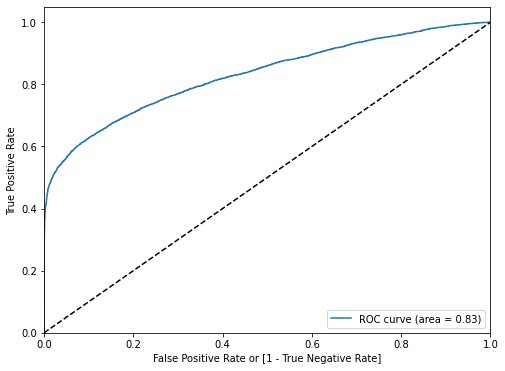

auc_score: 0.83


In [46]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 2 ))

**Choosing Threshold**

Threshold = 0.45

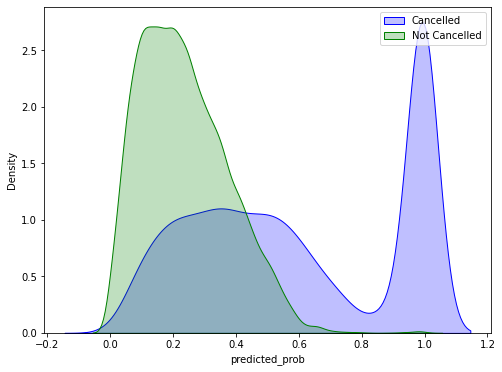

In [58]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Cancelled' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Not Cancelled' )
plt.legend()
plt.show()

In [59]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.45 else 0)
y_pred_df.sample(10, random_state = 42)

#predicted_prob = 0.412724
#probablity that the case 107606 belongs to class 0 is 0.412

actual  predicted_prob  predicted
28731        0        0.015176          0
102441       0        0.299566          0
112530       0        0.512119          1
46943        1        0.218907          0
16072        0        0.255988          0
8252         1        0.600022          1
5            0        0.257578          0
30715        0        0.181598          0
17879        0        0.252355          0
81517        0        0.045764          0

**Performance Measure From Confusion Matrix**

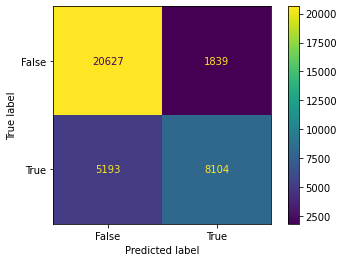

{'Accuracy': 0.8033722003187652, 'Precision': 0.8150457608367696, 'Sensitivity_recall': 0.6094607806272091, 'Specificity': 0.9181429716015312, 'F1_score': 0.6974182444061963}


In [60]:
confusion_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Accuracy = metrics.accuracy_score(y_pred_df.actual, y_pred_df.predicted)
Precision = metrics.precision_score(y_pred_df.actual, y_pred_df.predicted)
Sensitivity_recall = metrics.recall_score(y_pred_df.actual, y_pred_df.predicted)
Specificity = metrics.recall_score(y_pred_df.actual, y_pred_df.predicted, pos_label=0)
F1_score = metrics.f1_score(y_pred_df.actual, y_pred_df.predicted)

#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [61]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.80      0.92      0.85     22466
           1       0.82      0.61      0.70     13297

    accuracy                           0.80     35763
   macro avg       0.81      0.76      0.78     35763
weighted avg       0.80      0.80      0.80     35763



## <font color='Blue'>**2. Decision Tree**</font>

---



In [62]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_tree.fit( x_train, y_train )
clf_tree

DecisionTreeClassifier(max_depth=3)

In [63]:
tree_predict = clf_tree.predict_proba( x_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [64]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape

(35763, 2)

**Classifier Performance - RoC Curve**

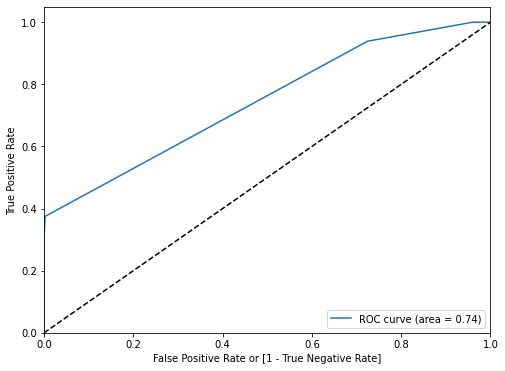

In [65]:
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

**Choosing Threshold**

Threshold: 0.3

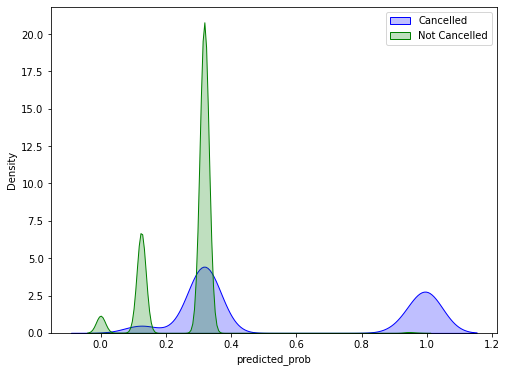

In [66]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Cancelled' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Not Cancelled' )
plt.legend()
plt.show()

In [73]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.30 else 0)

**Displaying Sample Tree With Gini Criteria & Depth = 4**

In [67]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz( clf_tree, out_file = "chd_tree.odt", feature_names = x_train.columns, 
                 class_names= ['Good Credit', 'Bad Credit'], filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )

True

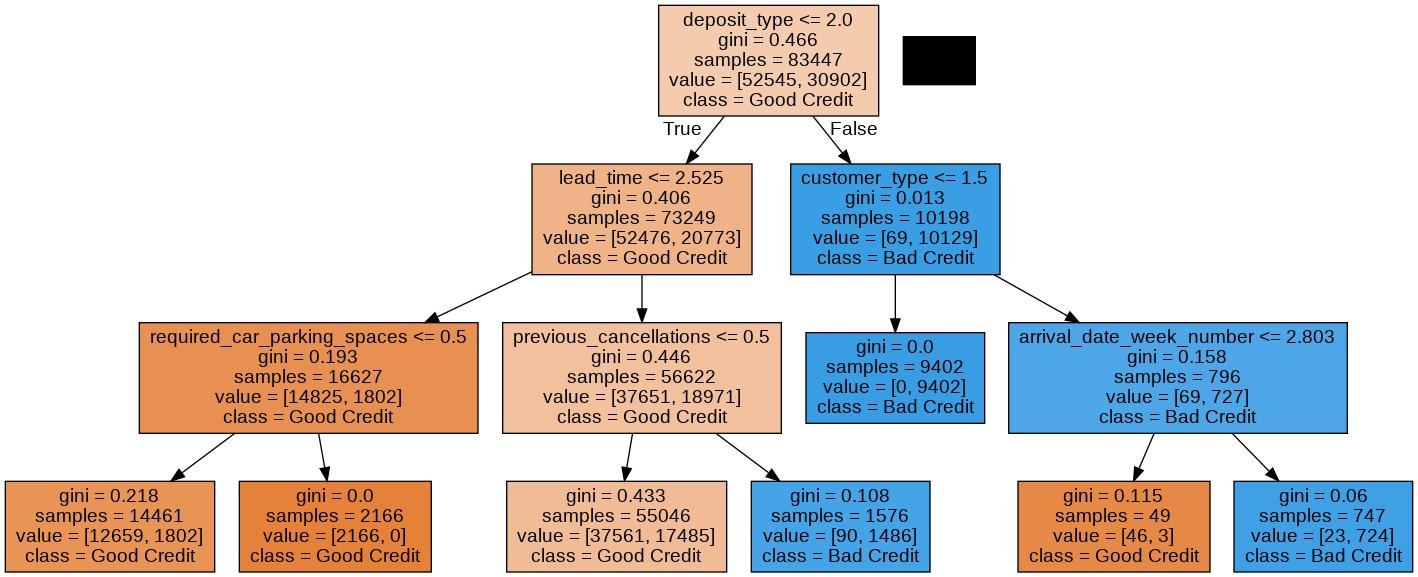

In [68]:
from IPython.display import Image
Image('chd_tree.png')

**Plotting Distributions and Identifying optimal probability**

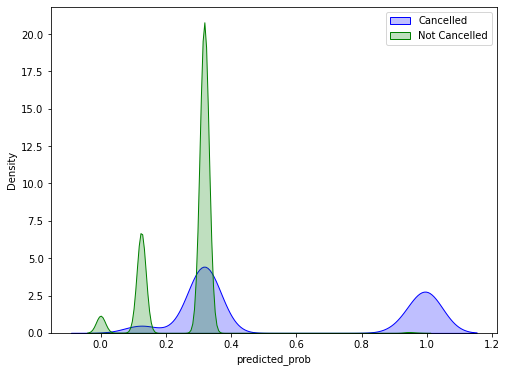

In [72]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Cancelled' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Not Cancelled' )
plt.legend()
plt.show()

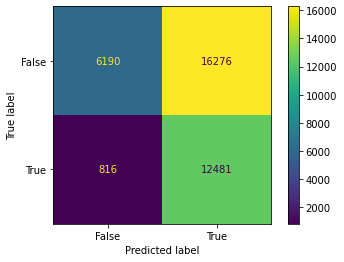

{'Accuracy': 0.5220758884881023, 'Precision': 0.43401606565358, 'Sensitivity_recall': 0.9386327743099947, 'Specificity': 0.27552746372295916, 'F1_score': 0.5935701716840254}


In [75]:
confusion_matrix = metrics.confusion_matrix(y_pred_df['actual'], y_pred_df['tree_predict'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Accuracy = metrics.accuracy_score(y_pred_df['actual'], y_pred_df['tree_predict'])
Precision = metrics.precision_score(y_pred_df['actual'], y_pred_df['tree_predict'])
Sensitivity_recall = metrics.recall_score(y_pred_df['actual'], y_pred_df['tree_predict'])
Specificity = metrics.recall_score(y_pred_df['actual'], y_pred_df['tree_predict'], pos_label=0)
F1_score = metrics.f1_score(y_pred_df['actual'], y_pred_df['tree_predict'])

#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [76]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.88      0.28      0.42     22466
           1       0.43      0.94      0.59     13297

    accuracy                           0.52     35763
   macro avg       0.66      0.61      0.51     35763
weighted avg       0.72      0.52      0.48     35763



**Finding Optimal Criteria For Decision Tree To Predict Hotel Room Will Be Cancelled Or Not**

In [77]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'],'max_depth': range(2,10)}]

clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc')
clf.fit(x_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [78]:
clf.best_score_

0.8851725210443098

In [79]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 9}

**Building Decision Tree With Max Depth = 9 & Criteria = gini**

In [80]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 9)
clf_tree.fit( x_train, y_train )

DecisionTreeClassifier(max_depth=9)

**Extracting Probablities**

In [81]:
tree_predict = clf_tree.predict_proba( x_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [82]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape

(35763, 2)

**Classifier Performance: RoC Curve**

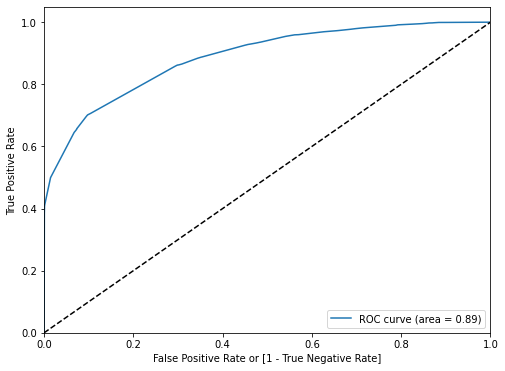

In [83]:
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

**Plotting Distributions and Identifying optimal probability**

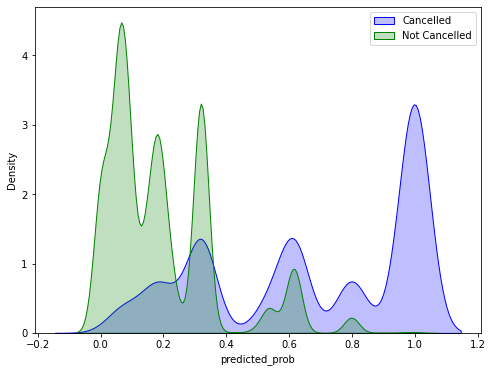

In [84]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Cancelled' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Not Cancelled')
plt.legend()
plt.show()

**Confusion Matrix and Peformance Measure**

In [85]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.25 else 0)

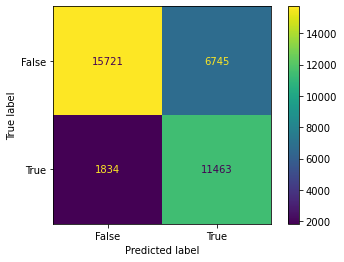

{'Accuracy': 0.7601152028632945, 'Precision': 0.6295584358523726, 'Sensitivity_recall': 0.8620741520643754, 'Specificity': 0.6997685391257901, 'F1_score': 0.7276940168227265}


In [87]:
confusion_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Accuracy = metrics.accuracy_score(y_pred_df.actual, y_pred_df.tree_predict)
Precision = metrics.precision_score(y_pred_df.actual, y_pred_df.tree_predict)
Sensitivity_recall = metrics.recall_score(y_pred_df.actual, y_pred_df.tree_predict)
Specificity = metrics.recall_score(y_pred_df.actual, y_pred_df.tree_predict, pos_label=0)
F1_score = metrics.f1_score(y_pred_df.actual, y_pred_df.tree_predict)

#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [88]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.90      0.70      0.79     22466
           1       0.63      0.86      0.73     13297

    accuracy                           0.76     35763
   macro avg       0.76      0.78      0.76     35763
weighted avg       0.80      0.76      0.76     35763



**Display Tree**

In [89]:
# Export the tree into odt file
export_graphviz( clf_tree, out_file = "chd_tree.odt", feature_names = x_train.columns, 
                 class_names= ['Cancelled', 'Not Cancelled'], filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )

True

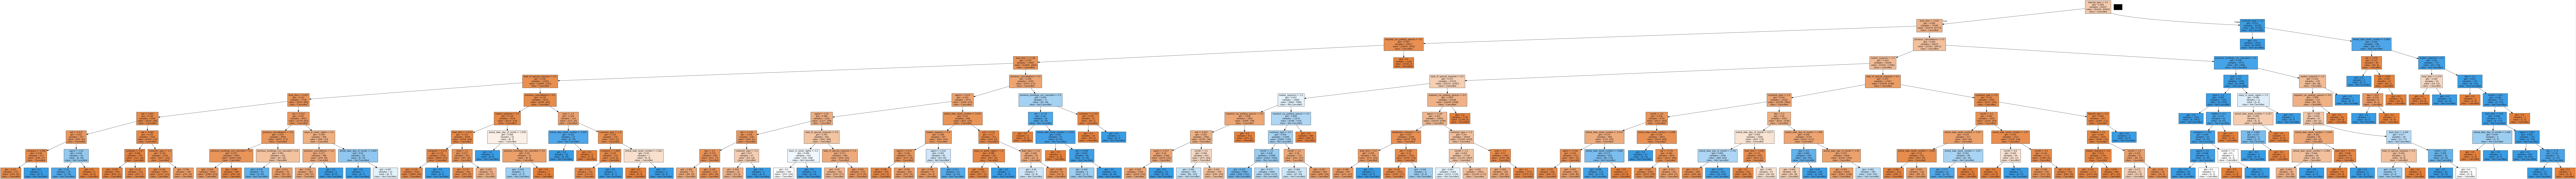

In [90]:
from IPython.display import Image
Image('chd_tree.png')

## <font color='Blue'>**3. Naive Bayes**</font>

---



In [91]:
gnb = GaussianNB().fit(x_train, y_train)

**Extracting Probablities**

In [92]:
gnb_predict = gnb.predict_proba( x_test )
gnb_predict = pd.DataFrame(gnb_predict)[1]
gnb_predict = gnb_predict.to_numpy()

In [93]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": gnb_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape

(35763, 2)

**Classifier Performance**

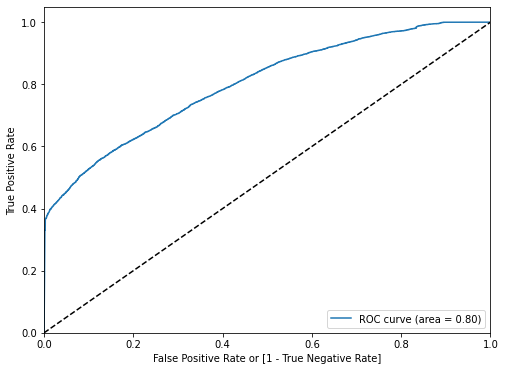

In [94]:
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

**Plotting distribution and identifying optimal probablity**

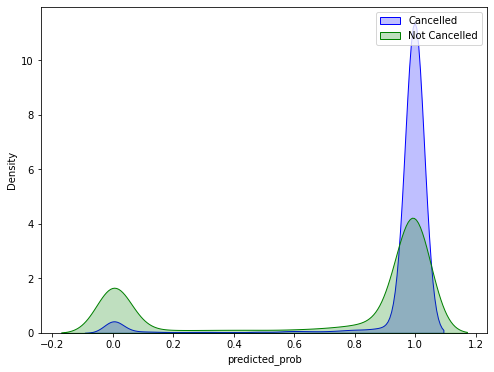

In [95]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Cancelled' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Not Cancelled' )
plt.legend()
plt.show()

**Confusion Matrix & Performance Measures**

In [96]:
y_pred_df['gnb_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.95 else 0)

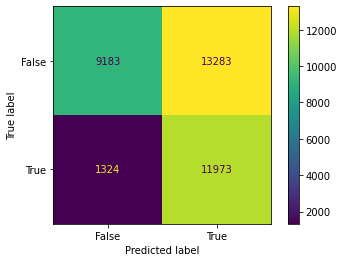

{'Accuracy': 0.5915611106450801, 'Precision': 0.4740655685777637, 'Sensitivity_recall': 0.9004286681206287, 'Specificity': 0.40875100151339805, 'F1_score': 0.6211189790677769}


In [97]:
confusion_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.gnb_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Accuracy = metrics.accuracy_score(y_pred_df.actual, y_pred_df.gnb_predict)
Precision = metrics.precision_score(y_pred_df.actual, y_pred_df.gnb_predict)
Sensitivity_recall = metrics.recall_score(y_pred_df.actual, y_pred_df.gnb_predict)
Specificity = metrics.recall_score(y_pred_df.actual, y_pred_df.gnb_predict, pos_label=0)
F1_score = metrics.f1_score(y_pred_df.actual, y_pred_df.gnb_predict)

#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [98]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['gnb_predict'] ) )

              precision    recall  f1-score   support

           0       0.87      0.41      0.56     22466
           1       0.47      0.90      0.62     13297

    accuracy                           0.59     35763
   macro avg       0.67      0.65      0.59     35763
weighted avg       0.73      0.59      0.58     35763



## <font color='Blue'>**4. KNN Classifier**</font>

---




In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**Training KNN**

In [106]:
knnmodel = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

**Applying KNN**

In [108]:
knn_predict= knnmodel.predict( x_test )

**Confusion Matrix**

In [109]:
y_pred_df['knn_predict'] = knn_predict

print("Y Predicted")
print(y_pred_df.knn_predict.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.knn_predict)
print(cm)



Y Predicted
0    24784
1    10979
Name: knn_predict, dtype: int64

Y Actual
0    22466
1    13297
Name: actual, dtype: int64

confusion matrix
[[21653   813]
 [ 3131 10166]]


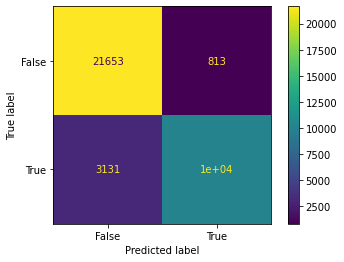

{'Accuracy': 0.8897184240695691, 'Precision': 0.9259495400309682, 'Sensitivity_recall': 0.7645333533879822, 'Specificity': 0.963811982551411, 'F1_score': 0.8375350140056023}


In [110]:
confusion_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.knn_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Accuracy = metrics.accuracy_score(y_pred_df.actual, y_pred_df.knn_predict)
Precision = metrics.precision_score(y_pred_df.actual, y_pred_df.knn_predict)
Sensitivity_recall = metrics.recall_score(y_pred_df.actual, y_pred_df.knn_predict)
Specificity = metrics.recall_score(y_pred_df.actual, y_pred_df.knn_predict, pos_label=0)
F1_score = metrics.f1_score(y_pred_df.actual, y_pred_df.knn_predict)

#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [111]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.knn_predict ) )

              precision    recall  f1-score   support

           0       0.87      0.96      0.92     22466
           1       0.93      0.76      0.84     13297

    accuracy                           0.89     35763
   macro avg       0.90      0.86      0.88     35763
weighted avg       0.89      0.89      0.89     35763



## <font color='Blue'>**Result Summary**</font>
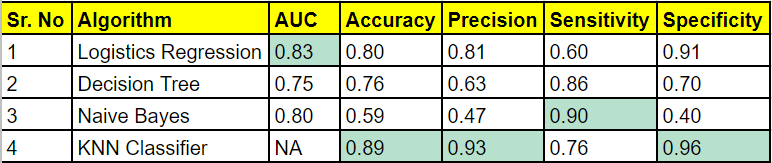



